# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape

# TODO: Number of testing examples.
n_test = X_test.shape

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set([label for label in y_train] + [label for label in y_test]))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = (39209, 32, 32, 3)
Number of testing examples = (12630, 32, 32, 3)
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import pandas as pd

Index  31387
Class ID  29
Sign Name:  Bicycles crossing


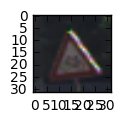

In [4]:
index = random.randint(0, X_train.shape[0])
df_signnames = pd.read_csv('./signnames.csv')
print('Index ', index)
print('Class ID ', y_train[index])
print('Sign Name: ', df_signnames[df_signnames['ClassId'] == y_train[index]]['SignName'].values[0])
plt.figure(figsize=(1, 1))
plt.imshow(X_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import numpy as np

# normalize if not normalized yet
if np.max(X_train) > 1:
    X_train = X_train / 255
else:
    print('Train data is already normalized.')
    
if np.max(X_test) > 1:
    X_test = X_test / 255
else:
    print('Test data is alreadly normalized.')

In [8]:
# Check the nomalization has been done successfully
import math

assert(math.isclose(np.min(X_train), 0, abs_tol=1e-5))
assert(math.isclose(np.max(X_train), 1, abs_tol=1e-5))
assert(math.isclose(np.min(X_test), 0, abs_tol=1e-5))
assert(math.isclose(np.max(X_test), 1, abs_tol=1e-5))

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
- Normalize the data. That is, I rescaled every value in the data to the float value between 0 and 1 (0 is the minimum value of image values and 1 is the maximum value of image values).
  -  Because normalization enables the model to work on differently scaled image data later. The model is able to learn and predict equally if images are normalized.
- Not converting images to gray scale
  - Because colors seemed important to classify traffic signs. 

In [9]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

X_train_sub, X_validation, y_train_sub, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print('Number of the original train data: ', X_train.shape[0])
print('Number of the train data for validation: ', X_train_sub.shape[0])

Number of the original train data:  39209
Number of the train data for validation:  31367


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Hyperparameter of the model
EPOCHS = 10
BATCH_SIZE = 128

mu = 0
sigma = 0.1


def LeNet(x):
    # Layer 1: Convolutional.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. 
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Pooling. 
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
- My final architecture is what is called LeNet.
- It has 5 layers:
  - Layer 1: Convolution, ReLu activation, Pooling, Input = 32x32x1 and Output = 28x28x6
  - Layer 2: Convolution, ReLu activation, Pooling, Input = 28x28x6 and Output = 14x14x6
  - Layer 3: Fully connected, Input = 400 and Output = 120
  - Layer 4: Fully connected, Input = 120 and Output = 84
  - Layer 5: Fully connected, Input = 84 and Output = 10.

### Train the model

In [13]:
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

rate = 0.001

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, axis=1), tf.argmax(one_hot_y, axis=1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_train[offset: offset + BATCH_SIZE], y_train[offset: offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples

In [14]:
# Training the Network
from sklearn.utils import shuffle


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {}".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './models/Final/final_model')
    print("Model saved")

EPOCH 1
Validation Accuracy = 0.769
EPOCH 2
Validation Accuracy = 0.902
EPOCH 3
Validation Accuracy = 0.940
EPOCH 4
Validation Accuracy = 0.959
EPOCH 5
Validation Accuracy = 0.974
EPOCH 6
Validation Accuracy = 0.983
EPOCH 7
Validation Accuracy = 0.985
EPOCH 8
Validation Accuracy = 0.986
EPOCH 9
Validation Accuracy = 0.985
EPOCH 10
Validation Accuracy = 0.995
Model saved


### Test the model

In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models/Final/'))
    
    test_accuracy = evaluate(X_test, y_test)
    print('Test accuracy = {:.3f}'.format(test_accuracy))

Test accuracy = 0.986


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
- Optimizer: Adam
- Batch size: 128
- Epochs: 10
- Learning rate: 0.001
- weights: generated from truncated normal distribution of mean = 0 and stddev = 0.1

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
- My solution is what is already known as LeNet.
- LeNet is good at recognizing hand written digit images. It is good at image recognition so I applied it to this problem. As expected, it seems LeNet works well and recognizes traffic sign images well.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Preprocessing on the new images are detailed in [**preprocess_new_image.ipynb**](./preprocess_new_image.ipynb)

In [16]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# comment out the below line because I chose 5 candidates after
# new_image_file_path = [file for file in os.listdir('./data/new_image/') if file.startswith('preprocessed_')]

# I chose the images from No. 7 to 11 as candidates
five_candidates = ['./data/new_image/preprocessed_{}.png'.format(n) for n in range(7, 12)]
images_candidate = [mpimg.imread(image) for image in five_candidates]

# preprocess the images
# remove the channel of alpha (because I don't need the channel) and leave only RGB channel
X_new = np.array([image[:, :, :3] for image in images_candidate])
# and check the shape of images
for image in X_new:
    assert(image.shape == (32, 32, 3))

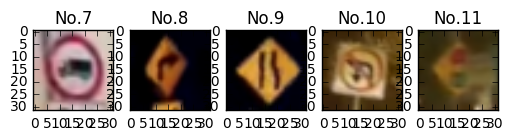

In [17]:
# Plot the images
fig, (ax1, ax2, ax3 ,ax4, ax5) = plt.subplots(1, 5)
ax1.imshow(X_new[0])
ax1.set_title('No.7')
ax2.imshow(X_new[1])
ax2.set_title('No.8')
ax3.imshow(X_new[2])
ax3.set_title('No.9')
ax4.imshow(X_new[3])
ax4.set_title('No.10')
ax5.imshow(X_new[4])
ax5.set_title('No.11')
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
- 5 candidate new images of traffic signs are above: from No.7 to No.11
-  No.11, classification might be difficult. The sign is not clear due to an obstacle.

In [56]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
pred = tf.argmax(logits, axis=1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models/Final/'))
    
    preds = sess.run(pred, feed_dict={x: X_new})
    print(preds)

[16 12 12 29 11]


In [57]:
for i, class_id in enumerate(preds):
    print('No.{}: '.format(i + 7), df_signnames[df_signnames['ClassId'] == class_id]['SignName'].values[0])

No.7:  Vehicles over 3.5 metric tons prohibited
No.8:  Priority road
No.9:  Priority road
No.10:  Bicycles crossing
No.11:  Right-of-way at the next intersection


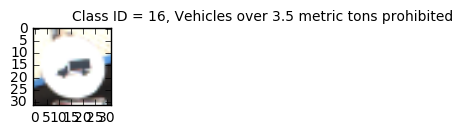

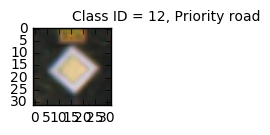

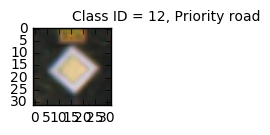

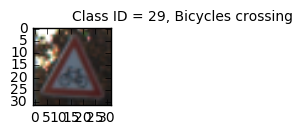

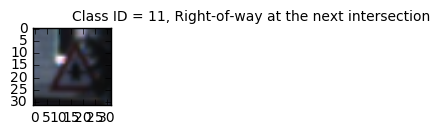

In [58]:
# Plot images of predicted class id
for class_id in preds:
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[y_train == class_id][0])
    sign_name = df_signnames[df_signnames['ClassId'] == class_id]['SignName'].values[0]
    plt.title('Class ID = {class_id}, {sign_name}'.format(class_id=class_id, sign_name=sign_name), fontsize=10, horizontalalignment='left')
    plt.show()

### Check with the 6 new images remained

In [48]:
remained_images = ['./data/new_image/preprocessed_{}.png'.format(i) for i in range(1, 7)]
remained_images = [mpimg.imread(image) for image in remained_images]
X_new_remained = np.array([image[:, :, :3] for image in remained_images])
# and check the shape of images
for image in X_new_remained:
    assert(image.shape == (32, 32, 3))

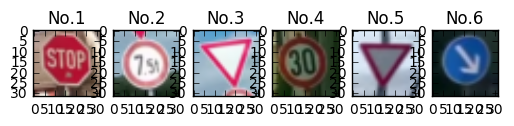

In [50]:
# Plot the images
fig, (ax1, ax2, ax3 ,ax4, ax5, ax6) = plt.subplots(1, 6)
ax1.imshow(X_new_remained[0])
ax1.set_title('No.1')
ax2.imshow(X_new_remained[1])
ax2.set_title('No.2')
ax3.imshow(X_new_remained[2])
ax3.set_title('No.3')
ax4.imshow(X_new_remained[3])
ax4.set_title('No.4')
ax5.imshow(X_new_remained[4])
ax5.set_title('No.5')
ax6.imshow(X_new_remained[5])
ax6.set_title('No.6')
plt.show()

In [51]:
# Predict with 6 new images above
pred = tf.argmax(logits, axis=1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models/Final/'))
    
    preds = sess.run(pred, feed_dict={x: X_new_remained})
    print(preds)

[14  7 13  1 13 38]


In [53]:
for i, class_id in enumerate(preds):
    print('No.{}: '.format(i + 1), df_signnames[df_signnames['ClassId'] == class_id]['SignName'].values[0])

No.1:  Stop
No.2:  Speed limit (100km/h)
No.3:  Yield
No.4:  Speed limit (30km/h)
No.5:  Yield
No.6:  Keep right


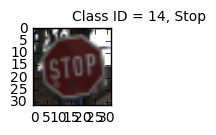

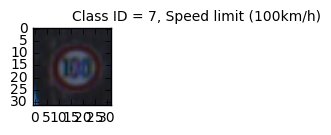

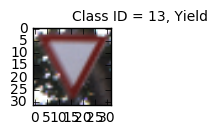

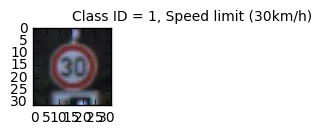

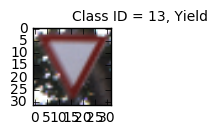

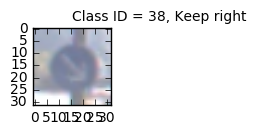

In [55]:
# Plot images of predicted class id
for class_id in preds:
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[y_train == class_id][0])
    sign_name = df_signnames[df_signnames['ClassId'] == class_id]['SignName'].values[0]
    plt.title('Class ID = {class_id}, {sign_name}'.format(class_id=class_id, sign_name=sign_name), fontsize=10, horizontalalignment='left')
    plt.show()

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
- My model does not seem to perform well on 5 new images.
- Accuracy manually computed is 20%.
  - No.7: correct
  - No.8: not correct
  - No.9: not correct
  - No.10: not correct
  - No.11: not correct
- However, it can be said that the model performs as well on new images as test images.
   - That's because the reason why the model failed to predict correctly is obvious. It failed with images it has never seen before (e.g image No.8 to No.11, No2 above).
   - It seems that the model could predict correctly with images it has seen before. All prediction on the new image No.1 and No.3 to No.7 are correct.
- When the model failed to make correct prediction, it mistook the image for similar image it has seen in training, which I think reasonable.

In [66]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
k = 3
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k=k)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models/Final/'))
    
    top_k_new = sess.run(top_k, feed_dict={x: X_new})
    top_k_new_remained = sess.run(top_k, feed_dict={x: X_new_remained})

In [67]:
# Top k predictions with the new image from No.7 to No.11
# No.9, certain about prediction, which is not correct
top_k_new

TopKV2(values=array([[  9.93253767e-01,   6.74622925e-03,   1.56467692e-08],
       [  7.29240179e-01,   2.70681500e-01,   5.44526374e-05],
       [  9.99982238e-01,   1.74539819e-05,   1.48417911e-07],
       [  5.85177660e-01,   3.81797045e-01,   1.92577858e-02],
       [  6.55670822e-01,   2.28350610e-01,   5.24551123e-02]], dtype=float32), indices=array([[16,  7,  8],
       [12, 14, 17],
       [12,  1, 14],
       [29,  1,  0],
       [11, 12, 14]], dtype=int32))

In [68]:
# Top k predictions with the new image from No.1 to No.6
# a little uncertain about prediction on No.2
top_k_new_remained

TopKV2(values=array([[  9.78703856e-01,   2.07868684e-02,   4.70287894e-04],
       [  7.14229703e-01,   2.85379380e-01,   3.42108106e-04],
       [  1.00000000e+00,   3.54161755e-15,   1.34356838e-17],
       [  9.86443281e-01,   1.35522680e-02,   2.87289186e-06],
       [  1.00000000e+00,   7.27491678e-11,   1.03709020e-15],
       [  9.99038100e-01,   9.61334154e-04,   5.11673250e-07]], dtype=float32), indices=array([[14, 17,  1],
       [ 7,  8,  4],
       [13,  3,  9],
       [ 1,  0,  2],
       [13,  3, 32],
       [38, 36, 34]], dtype=int32))

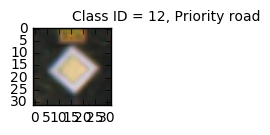

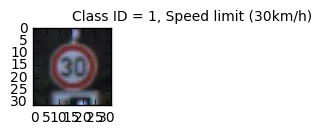

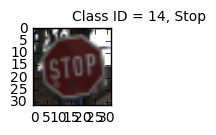

In [70]:
# Check the top 3 prediction on the new image No.9
preds_for_no9 = [12,  1, 14]
for class_id in preds_for_no9:
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[y_train == class_id][0])
    sign_name = df_signnames[df_signnames['ClassId'] == class_id]['SignName'].values[0]
    plt.title('Class ID = {class_id}, {sign_name}'.format(class_id=class_id, sign_name=sign_name), fontsize=10, horizontalalignment='left')
    plt.show()

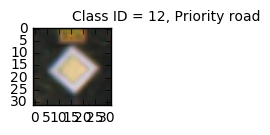

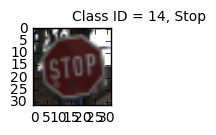

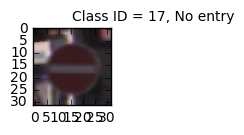

In [71]:
preds_for_no8 = [12, 14, 17]
for class_id in preds_for_no8:
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[y_train == class_id][0])
    sign_name = df_signnames[df_signnames['ClassId'] == class_id]['SignName'].values[0]
    plt.title('Class ID = {class_id}, {sign_name}'.format(class_id=class_id, sign_name=sign_name), fontsize=10, horizontalalignment='left')
    plt.show()

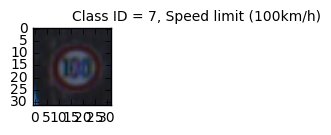

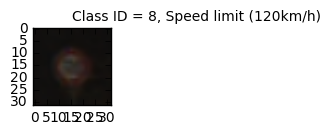

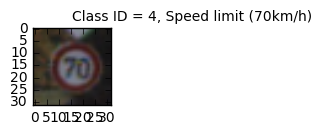

In [69]:
# Check the top 3 prediction on the new image No.2
preds_for_no2 = [ 7,  8,  4]
for class_id in preds_for_no2:
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[y_train == class_id][0])
    sign_name = df_signnames[df_signnames['ClassId'] == class_id]['SignName'].values[0]
    plt.title('Class ID = {class_id}, {sign_name}'.format(class_id=class_id, sign_name=sign_name), fontsize=10, horizontalalignment='left')
    plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
- Overall, the model is certain about prediction on images it has seen before. On the other hand, it is not certain about images it has never seen.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.